In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('winequality-white.csv',sep=";")

labels = df['quality']
data = df.drop(columns=['quality'])

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
input_dim = data_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
x = Dense(256, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='relu')(x)
encoded = Dense(encoding_dim, activation='linear')(x)

x = Dense(64, activation='relu')(encoded)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
decoded = Dense(input_dim, activation='sigmoid')(x)

autoencoder_2d = Model(input_layer, decoded)
encoder_2d = Model(input_layer, encoded)

autoencoder_2d.compile(optimizer='adam', loss='mse')

history = autoencoder_2d.fit(
    data_scaled, data_scaled,
    epochs=100,
    batch_size=32,
    shuffle=True,
    verbose=1,
    validation_split=0.1
)

encoded_data_2d = encoder_2d.predict(data_scaled)

Epoch 1/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0240 - val_loss: 0.0284
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0069 - val_loss: 0.0121
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0059 - val_loss: 0.0086
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 8/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 9/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 10/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 11/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 12/100
138/138 ━━━━━━━━━━━━━━━━━━━━

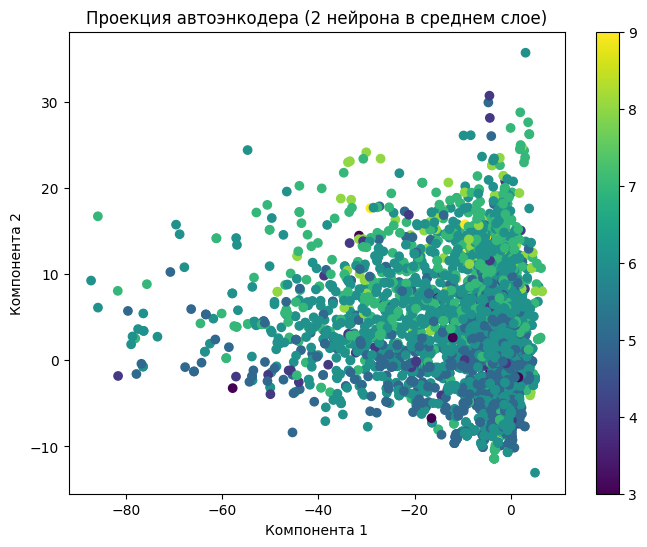

In [6]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_data_2d[:, 0], encoded_data_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.title('Проекция автоэнкодера (2 нейрона в среднем слое)')
plt.show()

In [7]:
input_dim = data_scaled.shape[1]
encoding_dim = 3
input_layer = Input(shape=(input_dim,))
x = Dense(256, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='relu')(x)
encoded = Dense(encoding_dim, activation='linear')(x)

x = Dense(64, activation='relu')(encoded)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
decoded = Dense(input_dim, activation='sigmoid')(x)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(
    data_scaled, data_scaled,
    epochs=100,
    batch_size=32,
    shuffle=True,
    verbose=1,
    validation_split=0.1
)

encoded_data_3d = encoder.predict(data_scaled)


Epoch 1/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0241 - val_loss: 0.0170
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0051 - val_loss: 0.0107
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0046 - val_loss: 0.0075
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 8/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 9/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 10/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 11/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 12/100
138/138 ━━━━━━━━━━━━━━━━━━━

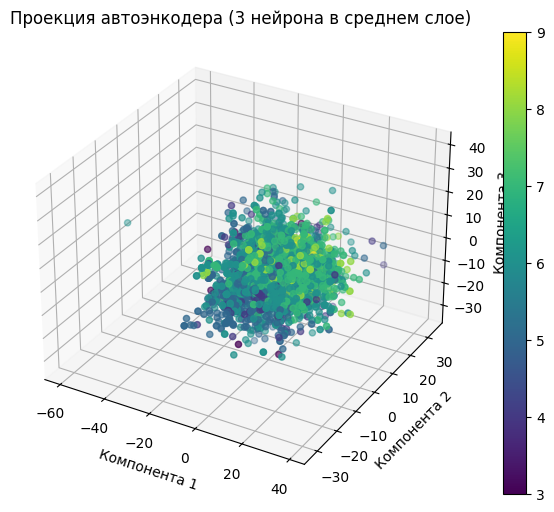

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_data_3d[:, 0], encoded_data_3d[:, 1], encoded_data_3d[:, 2], c=labels, cmap='viridis')
fig.colorbar(scatter)
ax.set_xlabel('Компонента 1')
ax.set_ylabel('Компонента 2')
ax.set_zlabel('Компонента 3')
ax.set_title('Проекция автоэнкодера (3 нейрона в среднем слое)')
plt.show()

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne_2d = TSNE(n_components=2, perplexity=40)
tsne_proj_2d = tsne_2d.fit_transform(data)

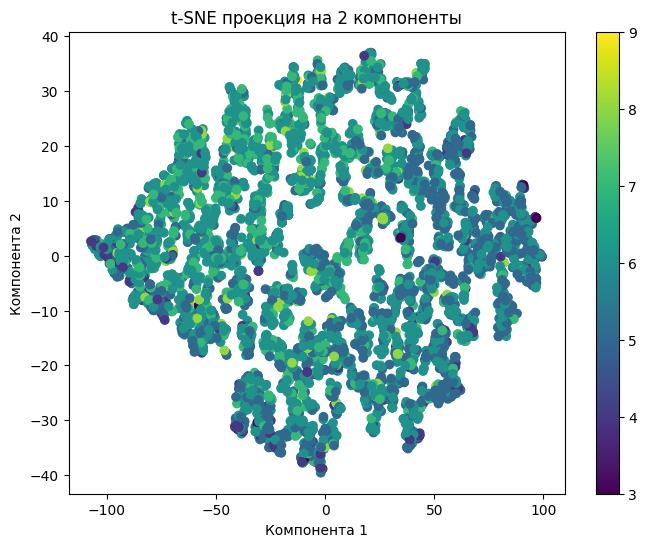

In [11]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_proj_2d[:, 0], tsne_proj_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.title('t-SNE проекция на 2 компоненты')
plt.show()

In [12]:
tsne_3d = TSNE(n_components=3, perplexity=40)
tsne_proj_3d = tsne_3d.fit_transform(data)

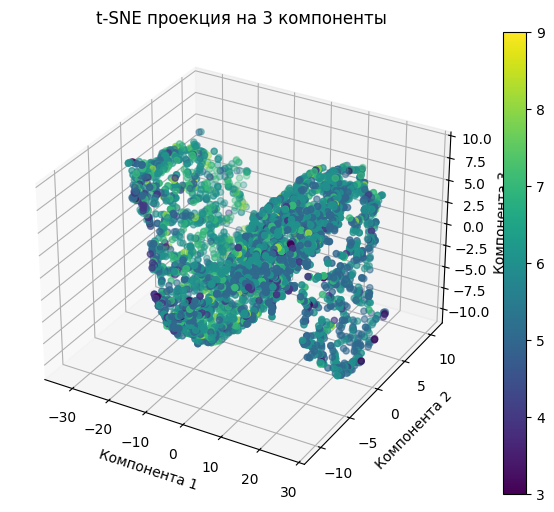

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_proj_3d[:, 0], tsne_proj_3d[:, 1], tsne_proj_3d[:, 2], c=labels, cmap='viridis')
fig.colorbar(scatter)
ax.set_xlabel('Компонента 1')
ax.set_ylabel('Компонента 2')
ax.set_zlabel('Компонента 3')
ax.set_title('t-SNE проекция на 3 компоненты')
plt.show()